# Homework 2

## Pair Programming Group Number: 34
## Members of Team: Michael Walters, Adrian Garcia

#### Practicing using numpy to do math, and more visualizations

More fun using the numerical package, numpy, a touch of pandas, and exercising your math vocabulary. 

In [2]:
# Your imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://gist.githubusercontent.com/yanyanzheng96/8fe13cc4b7c6a1391d4841018340a627/raw/f17479a580783a810cfe119186e63b5b28a87b4c/melb_data.csv'
df = pd.read_csv(url)
df.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Question 1 - Discrete PDF
Create a vector of 1000 random numbers from a Normal distribution with mean 5 and standard deviation 10 and plot the discrete probability density function of that vector using a histogram.  You should use [numpy random normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to create the vector. Always label your axes and give your plots titles (this holds for all questions). 

Text(0.5, 1.0, '1000 Random samples selected accordin to the Gaussian Distribution')

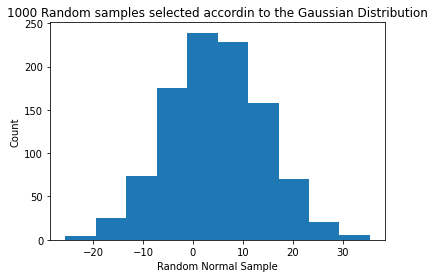

In [ ]:
random_vector = np.random.normal(loc = 5, scale = 10, size = 1000)
plt.hist(random_vector, bins = 10)
plt.xlabel("Random Normal Sample")
plt.ylabel("Count")
plt.title("1000 Random samples selected accordin to the Gaussian Distribution")

## Question 2 - Discrete CDF

Create a discrete cumulative density function plot using the same vector as the last question using a line graph.
Annotate the point, $x$, where 80% of the data < $x$ and 20% of the data is greater than $x$.  You can use the matplotlib pyplot function [plot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html) to draw the line, and to draw a star at the point $x$.  Use the [legend](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.legend.html) function to annotate the graph. 

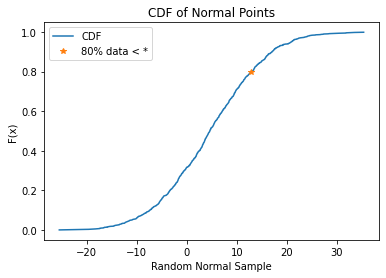

In [ ]:
x = np.sort(random_vector)
F_x = np.array(range(1000))/float(1000)

np.quantile(random_vector, q=0.8)

#plots
cdf = plt.plot(x, F_x, label = "CDF")
point = plt.plot(np.quantile(random_vector, q=0.8), 0.8, "*", label = "80% data < *")

#labels
plt.xlabel("Random Normal Sample")
plt.ylabel("F(x)")
plt.title("CDF of Normal Points")

# #legend
legend = plt.legend(["CDF","80% data < *"])

## Question 3 - Univariate Analysis

Load in the data from melb_data.csv into a pandas DataFrame.  Create a box and whisker graph comparing the prices in the suburbs:
  - Reservoir         
  - Richmond          
  - Bentleigh East
  
You should use the [boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) function, with the parameter `by`. 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Price (in millions of $)')

<Figure size 432x288 with 0 Axes>

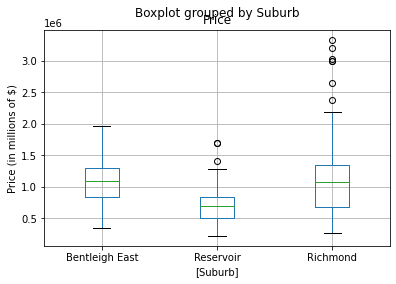

In [ ]:
#Slicing the dataframe for jus Suburb and Price Columns
df_price_suburbs = df[['Suburb','Price']].dropna()

#Splitting each suburb into its own dataframe with their respective price columns
df_reservoir = df_price_suburbs[(df_price_suburbs["Suburb"] == "Reservoir")]
df_richmond = df_price_suburbs[(df_price_suburbs["Suburb"] == "Richmond")] 
df_bentleigh = df_price_suburbs[(df_price_suburbs["Suburb"] == "Bentleigh East")]

#Concatenating the dataframes 
prices = [df_reservoir,df_richmond,df_bentleigh]
allPrices = pd.concat(prices)

#plotting the concatenated dataframe, with a new boxplot for each unique suburb
plt.figure()
allPrices.boxplot(by="Suburb")
plt.ylabel("Price (in millions of $)")


## Question 4 - Rotation with Matrices

Consider the vectors:
  - $\alpha$ which begins at (0,0) and ends at (1,1)
  - $\beta$ which begins at (1,1) and ends at (0,1)
  
Draw $\alpha$ and $\beta$ using a line graph using a different color for each vector.

Now, using matrix multiplication rotate the vectors 45 degrees (clockwise or counter-clockwise, you choose!) and draw the result.  You must use numpy's [matmul](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html) to accomplish the rotation. Numpy also has functions for `sin` and `cos`.  You should also get [pi](https://numpy.org/doc/stable/reference/constants.html?highlight=pi#numpy.pi) from the numpy package. 

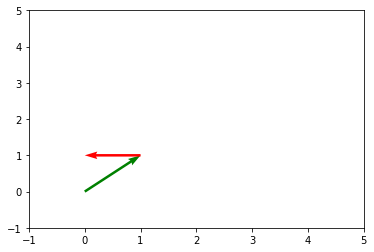

In [3]:
plt.figure()
ax = plt.gca()
ax.quiver(0, 0, 1, 1, angles='xy', scale_units='xy', scale=1, color='g' )
ax.quiver(1, 1, -1, 0, angles='xy', scale_units='xy', scale=1, color='r')
ax.set_xlim([-1, 5])
ax.set_ylim([-1, 5])
plt.draw()
plt.show()

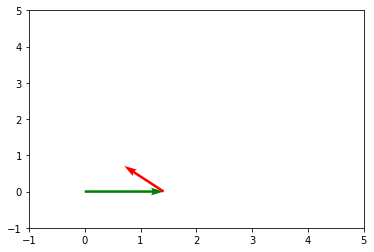

In [4]:
from math import cos, sin

theta = np.deg2rad(45)

rot45 = np.array([[cos(theta), -sin(theta)], [sin(theta), cos(theta)]])

# Second row is x2-x1
v1 = np.array([[0,0],[1,1]])
v2 = np.array([[1,1],[-1,0]])

v1_45 = np.matmul(v1,rot45)
v2_45 = np.matmul(v2,rot45)

plt.figure()
ax = plt.gca()
ax.quiver(v1_45[0][0], v1_45[0][1], v1_45[1][0], v1_45[1][1], angles='xy', scale_units='xy', scale=1, color='g' )
ax.quiver(v2_45[0][0], v2_45[0][1], v2_45[1][0], v2_45[1][1], angles='xy', scale_units='xy', scale=1, color='r')
ax.set_xlim([-1, 5])
ax.set_ylim([-1, 5])
plt.draw()
plt.show()

## Question 5 - Solving Systems of Equations with Matrices

Consider the following system of equations:
  - $2x +  y + z = 5$
  - $4x - 6y     = -2$
  - $-2x + 7y + 2z = 9$
  
Convert the coefficients of the system of equations to a matrix, $A$, where the first column contains the $x$ coefficients, the second column contains the $y$ coefficients, and the third column contains the $z$ coefficients. 
Covert the values on the right hand side to a (3,1) vector, $b$, (make sure you keep all the numbers in order.  Now, solve for $(x,y,z)$ by inverting $A$ and multiplying by $b$, eg, $A^{-1} * b$. 

Use the numpy [linear algebra inverse function](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) to find $A^{-1}$.

In [6]:
A = np.matrix('2 1 1; 4 -6 0; -2 7 2')

B = np.matrix('5; -2; 9')

Ainv = np.linalg.inv(A)

key = np.matmul(Ainv,B)

key

matrix([[1.],
        [1.],
        [2.]])